In [5]:
from warehouse.model import Warehouse
import matplotlib.pyplot as pl
import pandas as pd

# Analysis of the of the Warehouse Multiagent System

So far we have run our agent model only once until it completes and we have looked the individual agent behaviour. Now, we will analyse the behaviour of the warehouse and the agents at as whole.


First we need to define the parameters of our model and simulation. Note we also define something call `seed` which is a parameter required to generate pseudo-random numbers. If you are not familiar with `seeds` please read [this short blog](https://yourbasic.org/algorithms/random-number-generator-seed/) about it.

In [6]:
n_boxes = 50 
n_robots = 20
seed = 123
width = 500
height = 500
n_steps = 100 #No. the steps to run the simulation for.

Create an instance of the Warehouse model using the defined parameters.

In [7]:
m = Warehouse( n_robots, n_boxes, width=50, height=50,seed=seed)

Batch run (without web interface) the model for a given number of steps

In [8]:
for i in range(n_steps):
    m.step()

TypeError: 'str' object is not callable

We collect the relevant data from the model. See how the *Data Collector* is configured  in the `warehouse\model.py` file, particularly at the end of the `__init__` and `step` methods.

Here `datacollector` is a newly defined attribute of the model and we call the `get_model_vars_dataframe()` methods which is provided by `mesa`. 

The output of a data collector is a DataFrame object. We collect outputs in `m_df` and `ag_df`.

In [92]:
m_df = m.datacollector.get_model_vars_dataframe()
ag_df = m.datacollector.get_agent_vars_dataframe()


More on `mesa` data collection [here](https://mesa.readthedocs.io/en/latest/mesa.html#mesa-data-collection-module).


Now we can plot the key indicators we are collecting from the model. In this case we have a field for the number of `pending_boxes` at each step of the simulation. We can plot the dynamics of boxes in the warehouse as time progresses.

ValueError: setting an array element with a sequence.

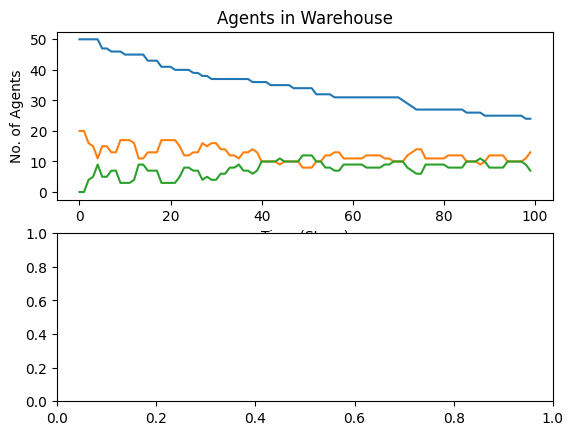

In [93]:
pl.subplot(211)
pl.plot(m_df.pending_boxes)
pl.xlabel("Time (Steps)")
pl.ylabel("No. of Agents")
pl.title("Agents in Warehouse")
pl.plot(m_df.free_robots)
